In [24]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import random

In [25]:
df = pd.read_csv('..\dataset\Employment_Unemployment_GDP_data.csv')

output_path = r"..\output\figure"
os.makedirs(output_path, exist_ok=True)

print(df.head().to_string())

df.rename(columns={
    'Country Name': 'Country',
    'Employment Sector: Agriculture': 'Labor_Agriculture',
    'Employment Sector: Industry': 'Labor_Industry',
    'Employment Sector: Services': 'Labor_Services',
    'Unemployment Rate': 'Unemployment_Rate',
    'GDP (in USD)': 'GDP'
}, inplace=True)

df.sample(5)



  Country Name  Year  Employment Sector: Agriculture  Employment Sector: Industry  Employment Sector: Services  Unemployment Rate  GDP (in USD)
0      Albania  1991                       53.299533                    12.172764                    34.527781             10.304  1.099559e+09
1      Algeria  1991                       24.118566                    25.067734                    50.813700             20.600  4.571568e+10
2       Angola  1991                       40.071857                     8.163345                    51.764822             16.855  1.060378e+10
3    Argentina  1991                       13.669999                    28.505903                    57.824098              5.440  1.897200e+11
4      Armenia  1991                       54.263252                    15.790454                    29.946294              1.783  2.069870e+09


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ACER\AppData\Local\Temp\ipykernel_3444\4076905125.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\dataset\Employment_Unemployment_GDP_data.csv')


Country  Year  Labor_Agriculture  Labor_Industry  \
2068  North Macedonia  2002          23.923529       33.298209   
5318             Mali  2020          68.061812        9.306093   
362           Bolivia  1993          42.903959       18.896138   
4080             Peru  2013          26.018429       17.796979   
5178     Sierra Leone  2019          44.845533       10.966026   

      Labor_Services  Unemployment_Rate           GDP  
2068       42.778262             31.940  4.018366e+09  
5318       22.632081              3.528  2.069856e+10  
362        38.199903              3.050  5.734699e+09  
4080       56.184592              3.575  2.011755e+11  
5178       44.188441              3.203  6.526184e+09

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5751 non-null   object 
 1   Year               5751 non-null   int64  
 2   Labor_Agriculture  5751 non-null   float64
 3   Labor_Industry     5751 non-null   float64
 4   Labor_Services     5751 non-null   float64
 5   Unemployment_Rate  5751 non-null   float64
 6   GDP                5751 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 314.6+ KB


In [27]:
print(df.isna().sum()/len(df) * 100)

Country              0.0
Year                 0.0
Labor_Agriculture    0.0
Labor_Industry       0.0
Labor_Services       0.0
Unemployment_Rate    0.0
GDP                  0.0
dtype: float64


In [28]:
df.dropna(inplace=True)
df.tail()

Country  Year  Labor_Agriculture  Labor_Industry  \
5746               Viet Nam  2022          33.609304       30.611964   
5747  Virgin Islands (U.S.)  2022           1.293486       15.193240   
5748     West Bank and Gaza  2022           6.220994       32.609239   
5749                 Zambia  2022          57.314602       10.346079   
5750               Zimbabwe  2022          52.610143       13.750807   

      Labor_Services  Unemployment_Rate           GDP  
5746       35.778734              1.523  4.134452e+11  
5747       83.513274             13.007  4.672000e+09  
5748       61.169768             24.420  1.916550e+10  
5749       32.339318              5.995  2.916378e+10  
5750       33.639050             10.087  3.278966e+10

In [29]:
print(df.isna().sum())

Country              0
Year                 0
Labor_Agriculture    0
Labor_Industry       0
Labor_Services       0
Unemployment_Rate    0
GDP                  0
dtype: int64


In [30]:
# 3.2.1. X·ª≠ l√Ω gi√° tr·ªã thi·∫øu
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\n ƒê√£ x·ª≠ l√Ω gi√° tr·ªã thi·∫øu.")


 ƒê√£ x·ª≠ l√Ω gi√° tr·ªã thi·∫øu.



Tr∆∞·ªõc khi x·ª≠ l√Ω outlier: (5751, 7)
Sau khi x·ª≠ l√Ω outlier: (5751, 7)


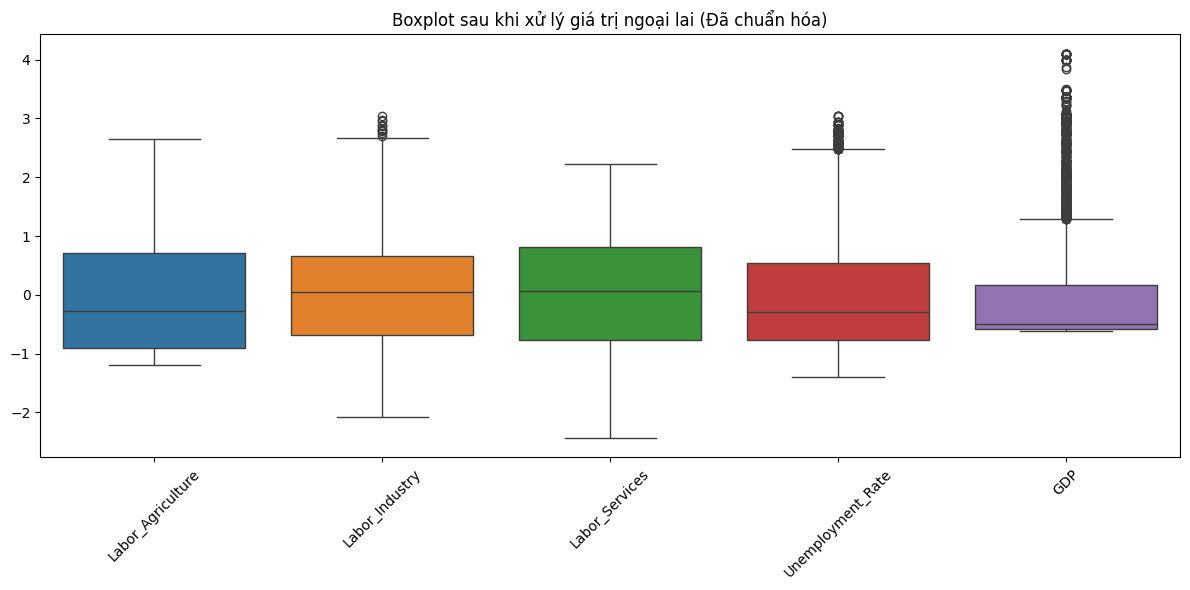

In [31]:
# 3.2.2. X·ª≠ l√Ω outlier (theo t·ª´ng nƒÉm v√† qu·ªëc gia)
print("\nTr∆∞·ªõc khi x·ª≠ l√Ω outlier:", df.shape)
def handle_outliers_by_year(data):
    numeric_cols = ['Labor_Agriculture', 'Labor_Industry', 'Labor_Services', 'Unemployment_Rate', 'GDP']
    df_clean = data.copy()
    for year in df_clean['Year'].unique():
        year_data = df_clean[df_clean['Year'] == year]
        Q1 = year_data[numeric_cols].quantile(0.25)
        Q3 = year_data[numeric_cols].quantile(0.75)
        IQR = Q3 - Q1
        for col in numeric_cols:
            lower_bound = Q1[col] - 1.5 * IQR[col]
            upper_bound = Q3[col] + 1.5 * IQR[col]
            mask = df_clean['Year'] == year
            df_clean.loc[mask, col] = df_clean.loc[mask, col].clip(lower_bound, upper_bound)
    
    return df_clean
df = handle_outliers_by_year(df)
print("Sau khi x·ª≠ l√Ω outlier:", df.shape)
plt.figure(figsize=(12,6))
numeric_cols = ['Labor_Agriculture', 'Labor_Industry', 'Labor_Services', 'Unemployment_Rate', 'GDP']
df_normalized = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())
sns.boxplot(data=df_normalized)
plt.title("Boxplot sau khi x·ª≠ l√Ω gi√° tr·ªã ngo·∫°i lai (ƒê√£ chu·∫©n h√≥a)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "boxplot_after_outliers.png"))
plt.show()
plt.close()

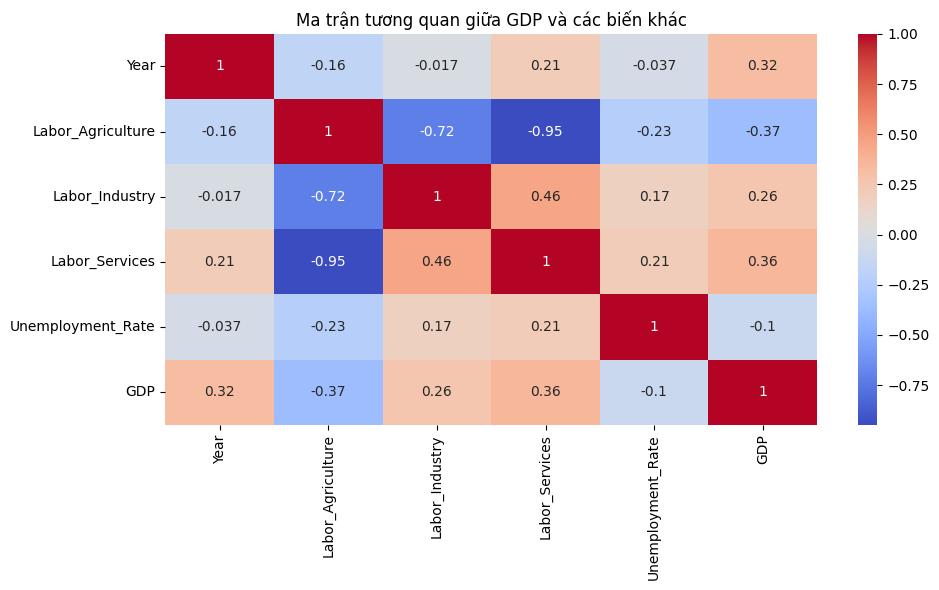

In [32]:
# 3.2.3. Ma tr·∫≠n t∆∞∆°ng quan
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa GDP v√† c√°c bi·∫øn kh√°c")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "heatmap_correlation.png"))
plt.show()
plt.close()


In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['GDP'], kde=True, color='skyblue', bins=30)
plt.title("Ph√¢n ph·ªëi GDP (USD)", fontweight='bold')
plt.xlabel("GDP (USD)")
plt.ylabel("T·∫ßn su·∫•t")
plt.tight_layout()

output_path = r"..\output\figure"
os.makedirs(output_path, exist_ok=True)
plt.savefig(os.path.join(output_path, "gdp_distribution.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì: gdp_distribution.png")

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì: gdp_distribution.png


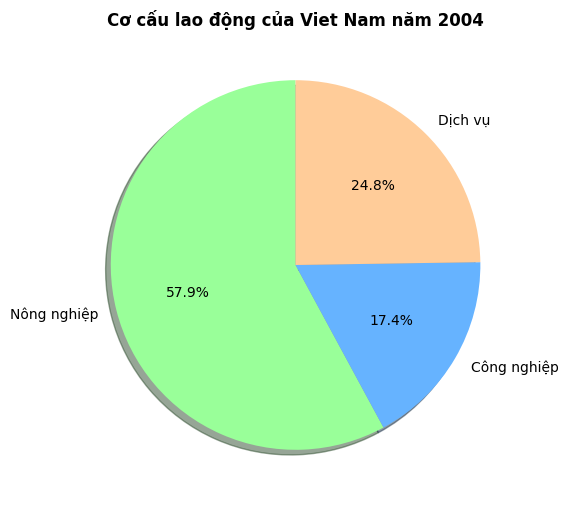

In [34]:
country_name = "Viet Nam"
year_selected = 2004
data_country = df[(df["Country"] == country_name) & (df["Year"] == year_selected)]

if not data_country.empty:
    values = [
        data_country["Labor_Agriculture"].values[0],
        data_country["Labor_Industry"].values[0],
        data_country["Labor_Services"].values[0]
    ]
    labels = ["N√¥ng nghi·ªáp", "C√¥ng nghi·ªáp", "D·ªãch v·ª•"]
    colors = ['#99ff99', '#66b3ff', '#ffcc99']

    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, colors=colors)
    plt.title(f"C∆° c·∫•u lao ƒë·ªông c·ªßa {country_name} nƒÉm {year_selected}", fontweight='bold')
    output_path = r"..\output\figure"
    os.makedirs(output_path, exist_ok=True)
    save_path = os.path.join(output_path, f"pie_labor_{country_name.replace(' ', '_')}_{year_selected}.png")
    plt.savefig(save_path)
    plt.show()
    plt.close()
else:
    all_years = df[df["Country"] == country_name]["Year"].sort_values(ascending=False)
    if not all_years.empty:
        print(f"‚ö†Ô∏è Kh√¥ng c√≥ d·ªØ li·ªáu cho {country_name} nƒÉm {year_selected}.")
        latest_year = all_years.iloc[0]
        print(f"üí° NƒÉm g·∫ßn nh·∫•t c√≥ d·ªØ li·ªáu l√†: {latest_year}")
    else:
        print(f"‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y d·ªØ li·ªáu cho {country_name}.")

C:\Users\ACER\AppData\Local\Temp\ipykernel_3444\704722635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unemp_random.index, y=unemp_random.values, palette="coolwarm")


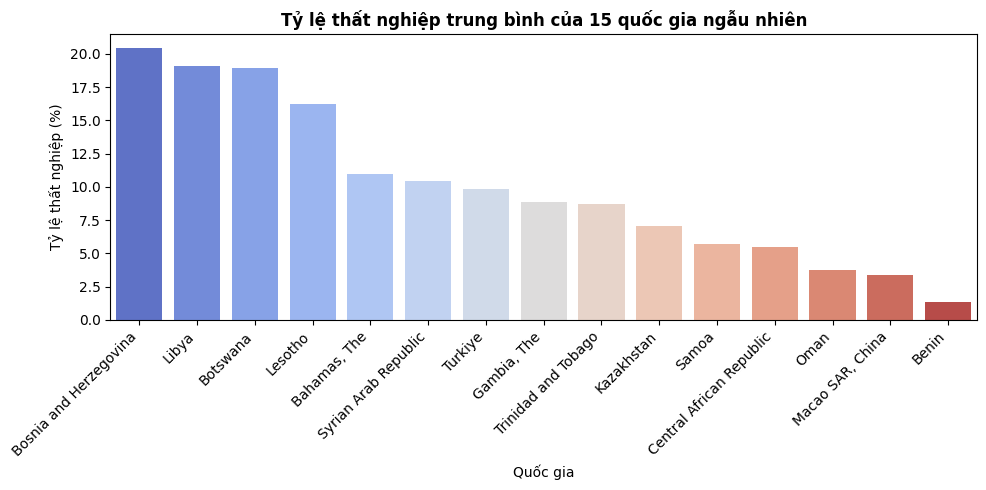

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì t·∫°i: ..\output\figure\unemployment_random_15_countries.png


In [35]:
countries = df["Country"].unique()
random_countries = random.sample(list(countries), 15)
unemp_random = df[df["Country"].isin(random_countries)] \
    .groupby("Country")["Unemployment_Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=unemp_random.index, y=unemp_random.values, palette="coolwarm")
plt.title("T·ª∑ l·ªá th·∫•t nghi·ªáp trung b√¨nh c·ªßa 15 qu·ªëc gia ng·∫´u nhi√™n", fontweight='bold')
plt.ylabel("T·ª∑ l·ªá th·∫•t nghi·ªáp (%)")
plt.xlabel("Qu·ªëc gia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
save_path = os.path.join(output_path, "unemployment_random_15_countries.png")
plt.savefig(save_path)
plt.show()
plt.close()

print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì t·∫°i: {save_path}")

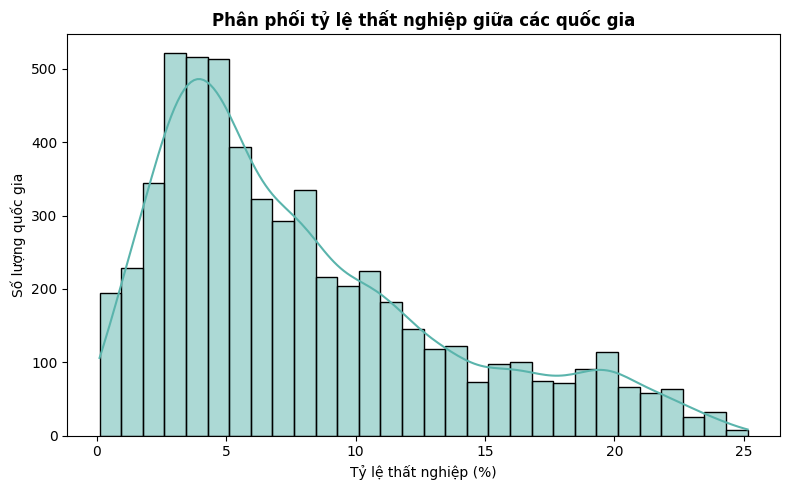

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(df["Unemployment_Rate"], bins=30, kde=True, color="#5ab4ac")
plt.title("Ph√¢n ph·ªëi t·ª∑ l·ªá th·∫•t nghi·ªáp gi·ªØa c√°c qu·ªëc gia", fontweight="bold")
plt.xlabel("T·ª∑ l·ªá th·∫•t nghi·ªáp (%)")
plt.ylabel("S·ªë l∆∞·ª£ng qu·ªëc gia")
plt.tight_layout()

save_path = os.path.join(output_path, "unemployment_distribution.png")
plt.savefig(save_path)
plt.show()
plt.close()


In [71]:

countries = random.sample(list(df["Country"].unique()), 5)

plt.figure(figsize=(10,6))
for country in countries:
    data_country = df[df["Country"] == country].sort_values(by="Year")
    plt.plot(data_country["Year"], data_country["GDP"], marker='o', label=country)

plt.title("Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán xu h∆∞·ªõng tƒÉng tr∆∞·ªüng GDP theo th·ªùi gian c·ªßa m·ªôt s·ªë qu·ªëc gia", fontweight='bold')
plt.xlabel("NƒÉm")
plt.ylabel("GDP (USD)")
plt.legend(title="Qu·ªëc gia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

save_path = os.path.join(output_path, "gdp_trend_random_countries.png")
plt.savefig(save_path)
plt.show()
plt.close()



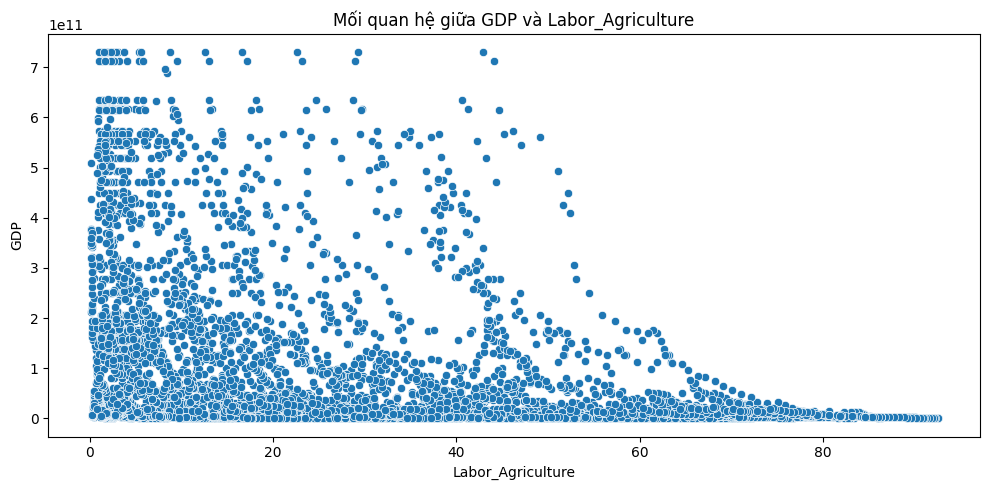

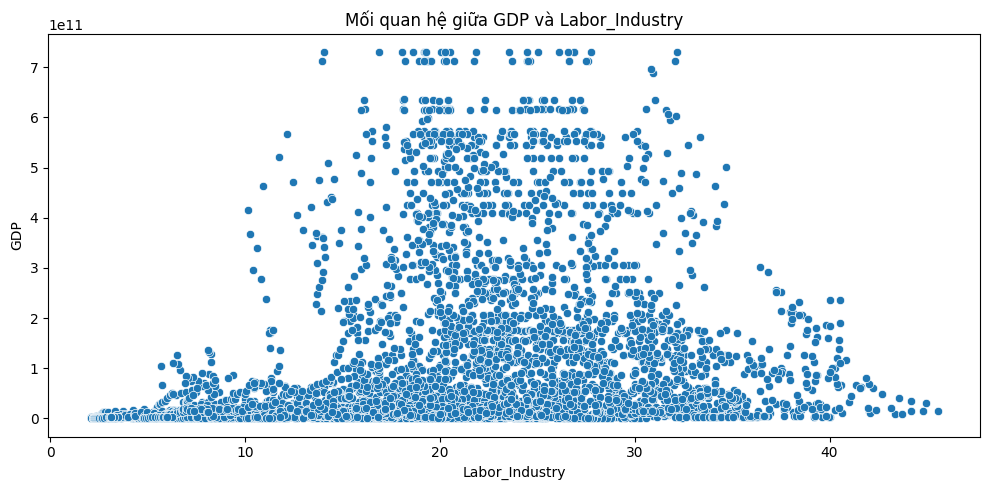

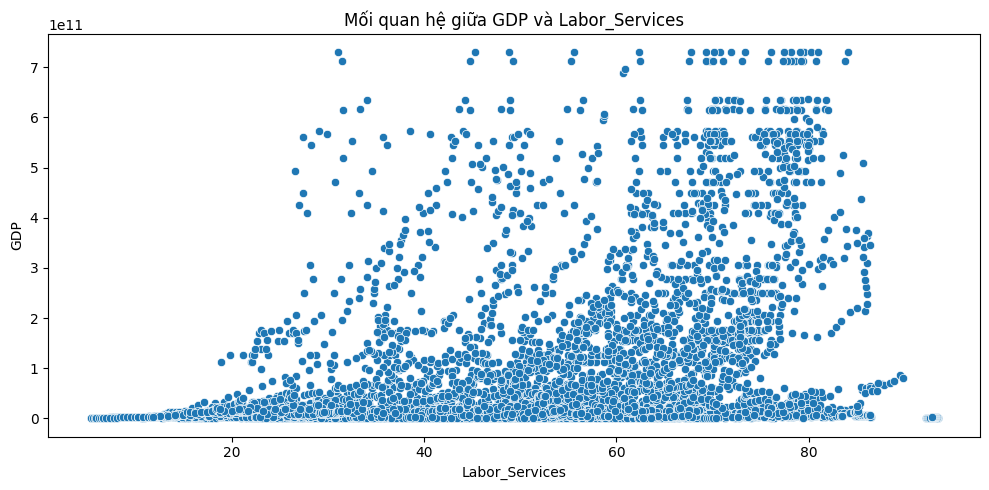

In [57]:
for col in ['Labor_Agriculture', 'Labor_Industry', 'Labor_Services']:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[col], y=df['GDP'])
    plt.title(f"M·ªëi quan h·ªá gi·ªØa GDP v√† {col}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"scatter_{col}.png"))
    plt.show()
    plt.close()


In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Unemployment_Rate"], y=df["GDP"], hue=df["Country"], legend=False)
plt.title("Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán m·ªëi quan h·ªá gi·ªØa T·ª∑ l·ªá th·∫•t nghi·ªáp v√† GDP", fontweight='bold')
plt.xlabel("T·ª∑ l·ªá th·∫•t nghi·ªáp (%)")
plt.ylabel("GDP (USD)")
plt.tight_layout()

save_path = os.path.join(output_path, "unemployment_vs_gdp.png")
plt.savefig(save_path)
plt.show()
plt.close()

print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì t·∫°i: {save_path}")


‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì t·∫°i: ..\output\figure\unemployment_vs_gdp.png


In [38]:
le = LabelEncoder()
df["Country_Code"] = le.fit_transform(df["Country"])
os.makedirs(r"..\output\model", exist_ok=True)
joblib.dump(le, r"..\output\model\country_encoder.joblib")

print(" ƒê√£ l∆∞u encoder t·∫°i ..\\output\\model\\country_encoder.joblib")

 ƒê√£ l∆∞u encoder t·∫°i ..\output\model\country_encoder.joblib


In [84]:

X = df[['Country_Code', 'Year', 'Labor_Agriculture', 'Labor_Industry', 'Labor_Services', 'Unemployment_Rate']]
y = df['GDP']

cols_to_scale = ['Year', 'Labor_Agriculture', 'Labor_Industry', 'Labor_Services', 'Unemployment_Rate']


scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
joblib.dump(scaler, r"..\output\model\scaler_country.joblib")
print(" ƒê√£ chu·∫©n h√≥a d·ªØ li·ªáu th√†nh c√¥ng!")
print(X_scaled.head().to_string())

 ƒê√£ chu·∫©n h√≥a d·ªØ li·ªáu th√†nh c√¥ng!
   Country_Code  Year  Labor_Agriculture  Labor_Industry  Labor_Services  Unemployment_Rate
0             1 -1.70               1.02           -0.89           -0.89               0.41
1             2 -1.70              -0.20            0.63           -0.03               2.24
2             3 -1.70               0.47           -1.36            0.02               1.57
3             4 -1.70              -0.63            1.03            0.34              -0.45
4             5 -1.70               1.06           -0.46           -1.13              -1.10


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(" ƒê√£ chia d·ªØ li·ªáu train/test.")

(4600, 6) (1151, 6) (4600,) (1151,)
 ƒê√£ chia d·ªØ li·ªáu train/test.


In [86]:
from lazypredict.Supervised import LazyRegressor
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)
print(models.head().to_string())


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 4600, number of used features: 6
[LightGBM] [Info] Start training from score 96859218453.836517
                               Adjusted R-Squared  R-Squared           RMSE  Time Taken
Model                                                                                  
XGBRegressor                                 0.94       0.94 37772531301.04        0.17
ExtraTreesRegressor                          0.93       0.93 40058235572.40        0.91
LGBMRegressor                                0.92       0.92 42676478514.65        0.12
HistGradientBoostingRegressor                0.92       0.92 43175710026.99        0.59
RandomForestRegressor                        0.90       0.90 48544139394.93        2.88


In [87]:
results_path = r"..\output\metric\metrics.csv"
if not os.path.exists(results_path):
    with open(results_path, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(["Model", "MAE", "RMSE", "R2"])
def evaluate_model(name, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\nüìä {name} results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R2: {r2:.3f}")
    with open(results_path, mode='a', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow([name, mae, rmse, r2])

    # ƒê·ªìng th·ªùi tr·∫£ v·ªÅ dict n·∫øu mu·ªën t·∫°o DataFrame sau
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}


üìä Extra Trees Regressor results:
MAE: 20073909209.319 | RMSE: 40058235572.398 | R2: 0.933


‚úÖ ƒê√£ l∆∞u: ExtraTree_actual_vs_predicted.png


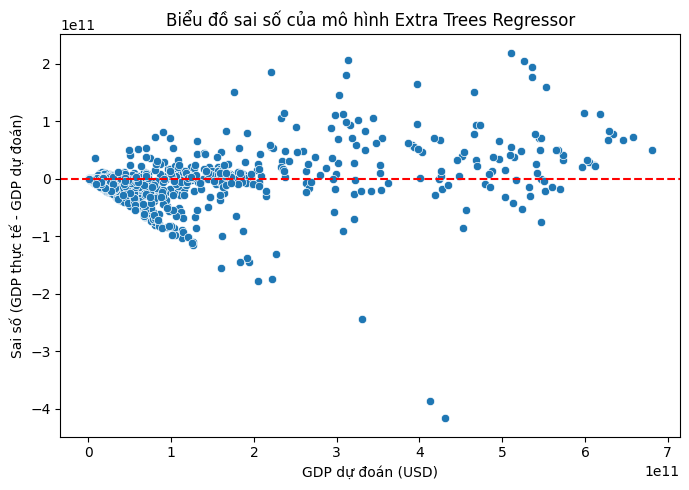

‚úÖ ƒê√£ l∆∞u: ExtraTree_residuals.png


‚úÖ ƒê√£ l∆∞u: ExtraTree_error_distribution.png


['..\\output\\model\\extra_trees_model.joblib']

In [88]:
tr = ExtraTreesRegressor(n_estimators=100, random_state=42)
tr.fit(X_train, y_train)
y_pred_tr = tr.predict(X_test)
results_tr = evaluate_model("Extra Trees Regressor", tr, y_test, y_pred_tr)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_tr)
plt.xlabel("GDP th·ª±c t·∫ø (USD)")
plt.ylabel("GDP d·ª± ƒëo√°n (USD)")
plt.title("Bi·ªÉu ƒë·ªì so s√°nh GDP th·ª±c t·∫ø v√† GDP d·ª± ƒëo√°n - Extra Trees Regressor")
# V·∫Ω th√™m ƒë∆∞·ªùng ch√©o ƒë·ªÉ th·∫•y ƒë·ªô kh·ªõp
min_val = min(min(y_test), min(y_pred_tr))
max_val = max(max(y_test), max(y_pred_tr))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.tight_layout()
plt.savefig(os.path.join(output_path, "ExtraTree_actual_vs_predicted.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: ExtraTree_actual_vs_predicted.png")

# === 2Ô∏è‚É£ Bi·ªÉu ƒë·ªì sai s·ªë (Residual Plot) ===
residuals = y_test - y_pred_tr
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_tr, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("GDP d·ª± ƒëo√°n (USD)")
plt.ylabel("Sai s·ªë (GDP th·ª±c t·∫ø - GDP d·ª± ƒëo√°n)")
plt.title("Bi·ªÉu ƒë·ªì sai s·ªë c·ªßa m√¥ h√¨nh Extra Trees Regressor")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "ExtraTree_residuals.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: ExtraTree_residuals.png")

# === 3Ô∏è‚É£ Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi sai s·ªë (Histogram) ===
plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Ph√¢n ph·ªëi sai s·ªë m√¥ h√¨nh Extra Trees Regressor")
plt.xlabel("Sai s·ªë (USD)")
plt.ylabel("T·∫ßn su·∫•t")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "ExtraTree_error_distribution.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: ExtraTree_error_distribution.png")
plt.show()

model_path = r"..\output\model\extra_trees_model.joblib"
joblib.dump(tr, model_path)


üìä Gradient Boosting Regressor results:
MAE: 55285463107.519 | RMSE: 89292097263.265 | R2: 0.666


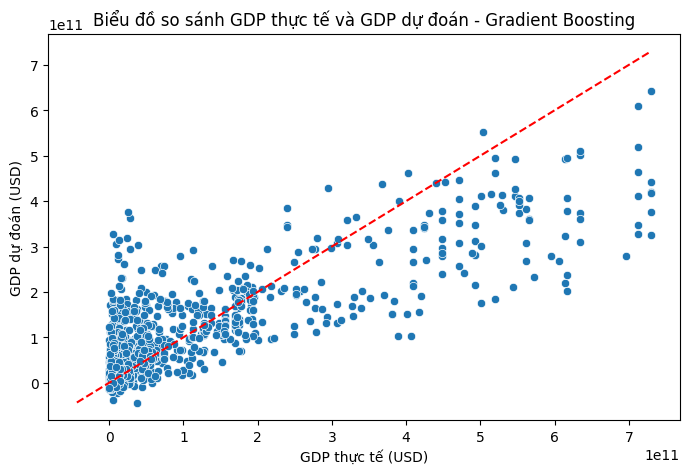

 ƒê√£ l∆∞u: GradientBoosting_actual_vs_predicted.png


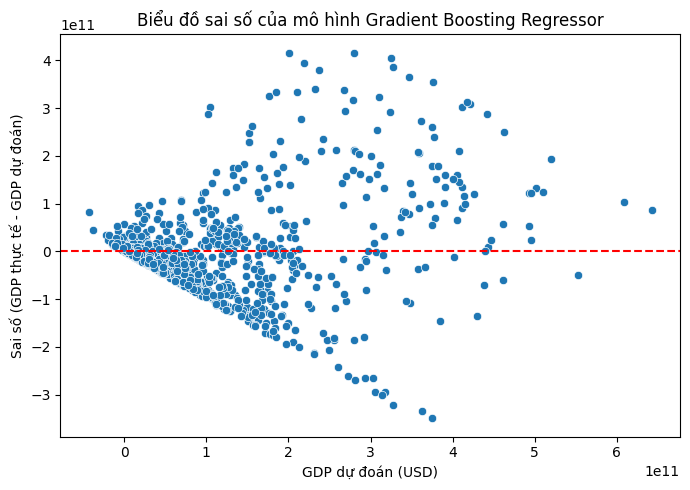

‚úÖ ƒê√£ l∆∞u: GradientBoosting_residuals.png


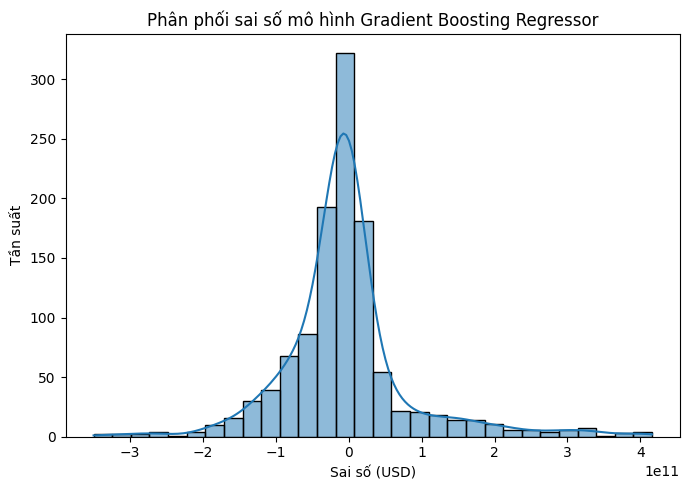

‚úÖ ƒê√£ l∆∞u: GraidentBoosting_error_distribution.png


['..\\output\\model\\gradient_boosting_model.joblib']

In [89]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
results_gb = evaluate_model("Gradient Boosting Regressor", gb, y_test, y_pred_gb)
model_path = r"..\output\model\gradient_boosting_model.joblib"
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.xlabel("GDP th·ª±c t·∫ø (USD)")
plt.ylabel("GDP d·ª± ƒëo√°n (USD)")
plt.title("Bi·ªÉu ƒë·ªì so s√°nh GDP th·ª±c t·∫ø v√† GDP d·ª± ƒëo√°n - Gradient Boosting")
min_val = min(min(y_test), min(y_pred_gb))
max_val = max(max(y_test), max(y_pred_gb))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.tight_layout()
plt.savefig(os.path.join(output_path, "GradientBoosting_actual_vs_predicted.png"))
plt.show()
plt.close()
print(" ƒê√£ l∆∞u: GradientBoosting_actual_vs_predicted.png")


residuals = y_test - y_pred_gb
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_gb, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("GDP d·ª± ƒëo√°n (USD)")
plt.ylabel("Sai s·ªë (GDP th·ª±c t·∫ø - GDP d·ª± ƒëo√°n)")
plt.title("Bi·ªÉu ƒë·ªì sai s·ªë c·ªßa m√¥ h√¨nh Gradient Boosting Regressor")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "GradientBoosting_residuals.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: GradientBoosting_residuals.png")

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Ph√¢n ph·ªëi sai s·ªë m√¥ h√¨nh Gradient Boosting Regressor")
plt.xlabel("Sai s·ªë (USD)")
plt.ylabel("T·∫ßn su·∫•t")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "GradientBoosting_error_distribution.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: GraidentBoosting_error_distribution.png")
joblib.dump(gb, model_path)


üìä Linear Regression results:
MAE: 95112553018.273 | RMSE: 134103802892.313 | R2: 0.248


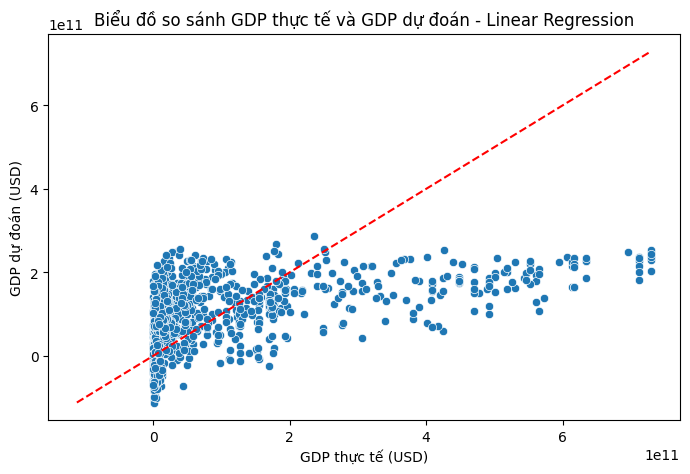

 ƒê√£ l∆∞u: LinearRegression_actual_vs_predicted.png


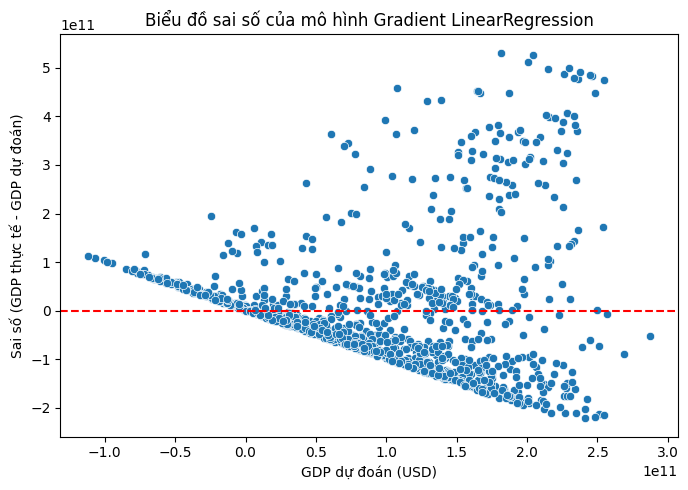

‚úÖ ƒê√£ l∆∞u: LinearRegression_residuals.png


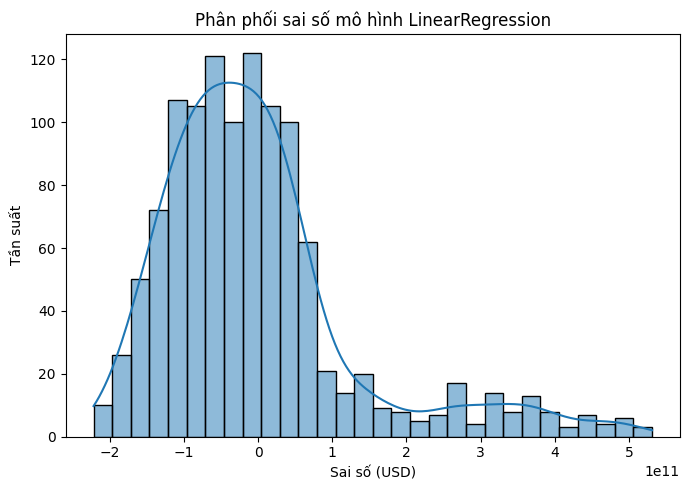

['..\\output\\model\\linear_regression_model.joblib']

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results_lr = evaluate_model("Linear Regression", lr, y_test, y_pred_lr)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("GDP th·ª±c t·∫ø (USD)")
plt.ylabel("GDP d·ª± ƒëo√°n (USD)")
plt.title("Bi·ªÉu ƒë·ªì so s√°nh GDP th·ª±c t·∫ø v√† GDP d·ª± ƒëo√°n - Linear Regression")
min_val = min(min(y_test), min(y_pred_lr))
max_val = max(max(y_test), max(y_pred_lr))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.tight_layout()
plt.savefig(os.path.join(output_path, "LinearRegression_actual_vs_predicted.png"))
plt.show()
plt.close()
print(" ƒê√£ l∆∞u: LinearRegression_actual_vs_predicted.png")


residuals = y_test - y_pred_lr
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("GDP d·ª± ƒëo√°n (USD)")
plt.ylabel("Sai s·ªë (GDP th·ª±c t·∫ø - GDP d·ª± ƒëo√°n)")
plt.title("Bi·ªÉu ƒë·ªì sai s·ªë c·ªßa m√¥ h√¨nh Gradient LinearRegression")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "LinearRegression_residuals.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: LinearRegression_residuals.png")

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Ph√¢n ph·ªëi sai s·ªë m√¥ h√¨nh LinearRegression")
plt.xlabel("Sai s·ªë (USD)")
plt.ylabel("T·∫ßn su·∫•t")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "LinearRegression_error_distribution.png"))
plt.show()
plt.close()

model_path = r"..\output\model\linear_regression_model.joblib"
joblib.dump(lr, model_path)


üìä Random Forest results:
MAE: 24254703785.492 | RMSE: 48532920715.749 | R2: 0.901


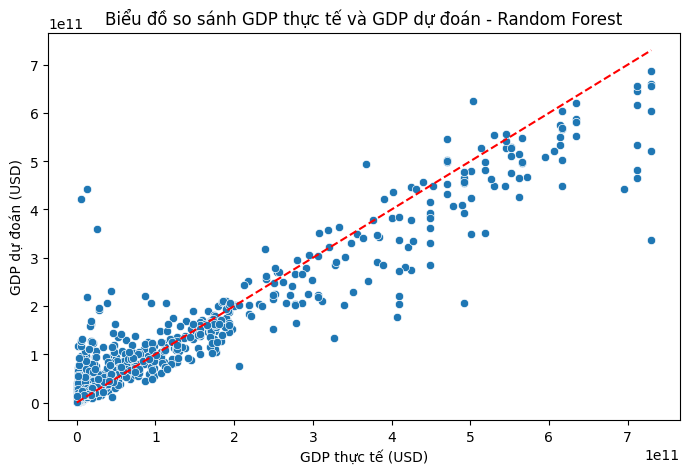

 ƒê√£ l∆∞u: RandomForest_actual_vs_predicted.png


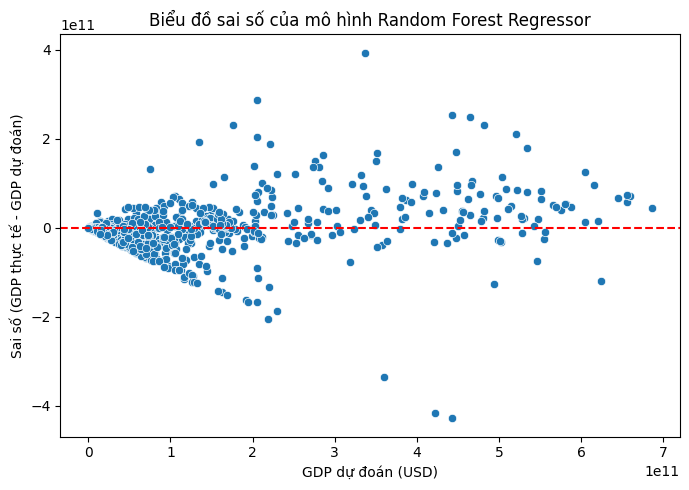

‚úÖ ƒê√£ l∆∞u: RandomForest_residuals.png


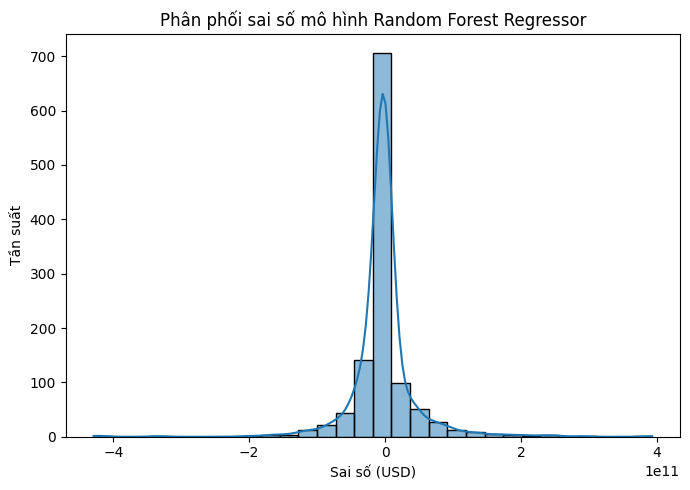

['..\\output\\model\\random_forest_model.joblib']

In [46]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results_rf = evaluate_model("Random Forest", rf, y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("GDP th·ª±c t·∫ø (USD)")
plt.ylabel("GDP d·ª± ƒëo√°n (USD)")
plt.title("Bi·ªÉu ƒë·ªì so s√°nh GDP th·ª±c t·∫ø v√† GDP d·ª± ƒëo√°n - Random Forest")
min_val = min(min(y_test), min(y_pred_rf))
max_val = max(max(y_test), max(y))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.tight_layout()
plt.savefig(os.path.join(output_path, "RandomForest_actual_vs_predicted.png"))
plt.show()
plt.close()
print(" ƒê√£ l∆∞u: RandomForest_actual_vs_predicted.png")


residuals = y_test - y_pred_rf
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("GDP d·ª± ƒëo√°n (USD)")
plt.ylabel("Sai s·ªë (GDP th·ª±c t·∫ø - GDP d·ª± ƒëo√°n)")
plt.title("Bi·ªÉu ƒë·ªì sai s·ªë c·ªßa m√¥ h√¨nh Random Forest Regressor")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "RandomForest_residuals.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: RandomForest_residuals.png")

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Ph√¢n ph·ªëi sai s·ªë m√¥ h√¨nh Random Forest Regressor")
plt.xlabel("Sai s·ªë (USD)")
plt.ylabel("T·∫ßn su·∫•t")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "RandomForest_error_distribution.png"))
plt.show()
plt.close()
model_path = r"..\output\model\random_forest_model.joblib"
joblib.dump(rf, model_path)


üìä Support Vector Regression results:
MAE: 85361202794.451 | RMSE: 170480642090.344 | R2: -0.216


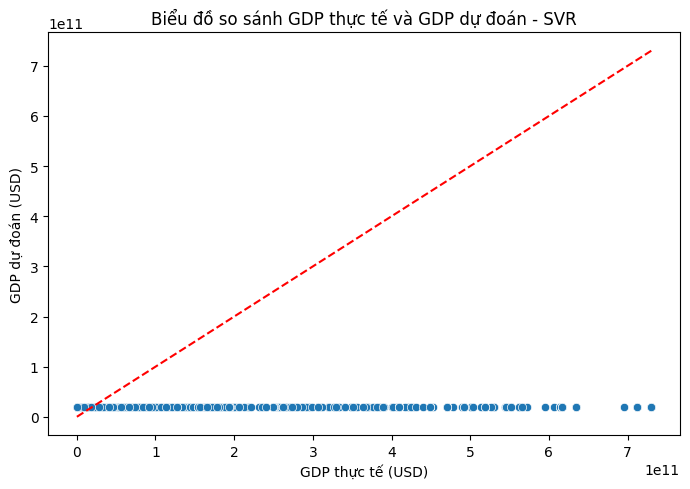

‚úÖ ƒê√£ l∆∞u: svr_actual_vs_predicted.png


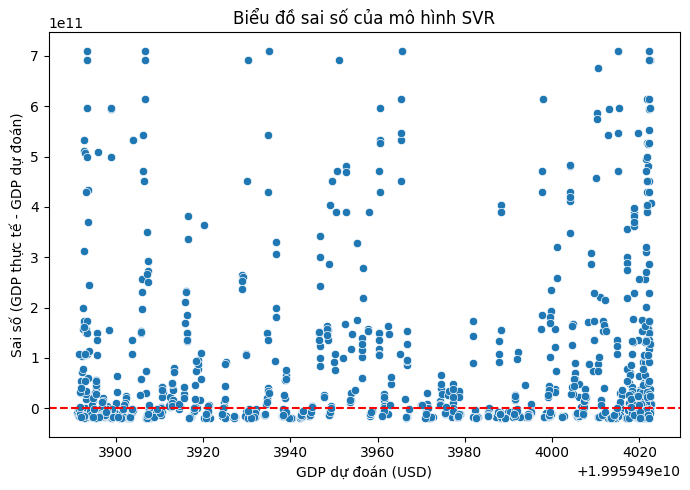

‚úÖ ƒê√£ l∆∞u: svr_residuals.png


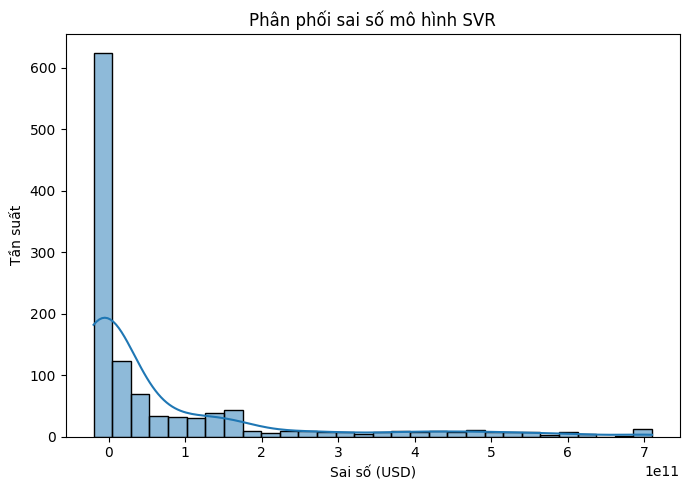

‚úÖ ƒê√£ l∆∞u: svr_error_distribution.png


['..\\output\\model\\svr_model.joblib']

In [47]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
results_svr = evaluate_model("Support Vector Regression", svr, y_test, y_pred_svr)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.xlabel("GDP th·ª±c t·∫ø (USD)")
plt.ylabel("GDP d·ª± ƒëo√°n (USD)")
plt.title("Bi·ªÉu ƒë·ªì so s√°nh GDP th·ª±c t·∫ø v√† GDP d·ª± ƒëo√°n - SVR")

min_val = min(min(y_test), min(y_pred_svr))
max_val = max(max(y_test), max(y_pred_svr))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.tight_layout()
plt.savefig(os.path.join(output_path, "svr_actual_vs_predicted.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: svr_actual_vs_predicted.png")


residuals = y_test - y_pred_svr
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_svr, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("GDP d·ª± ƒëo√°n (USD)")
plt.ylabel("Sai s·ªë (GDP th·ª±c t·∫ø - GDP d·ª± ƒëo√°n)")
plt.title("Bi·ªÉu ƒë·ªì sai s·ªë c·ªßa m√¥ h√¨nh SVR")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "svr_residuals.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: svr_residuals.png")

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Ph√¢n ph·ªëi sai s·ªë m√¥ h√¨nh SVR")
plt.xlabel("Sai s·ªë (USD)")
plt.ylabel("T·∫ßn su·∫•t")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "svr_error_distribution.png"))
plt.show()
plt.close()
print("‚úÖ ƒê√£ l∆∞u: svr_error_distribution.png")
model_path = r"..\output\model\svr_model.joblib"
joblib.dump(svr, model_path)

In [48]:
results = pd.DataFrame([results_lr, results_rf, results_svr,results_tr,results_gb])
print("\nüìà So s√°nh m√¥ h√¨nh:\n", results)



üìà So s√°nh m√¥ h√¨nh:
                          Model            MAE            RMSE    R2
0            Linear Regression 95112553018.27 134103802892.31  0.25
1                Random Forest 24254703785.49  48532920715.75  0.90
2    Support Vector Regression 85361202794.45 170480642090.34 -0.22
3        Extra Trees Regressor 20073909209.32  40058235572.40  0.93
4  Gradient Boosting Regressor 55285463107.52  89292097263.26  0.67


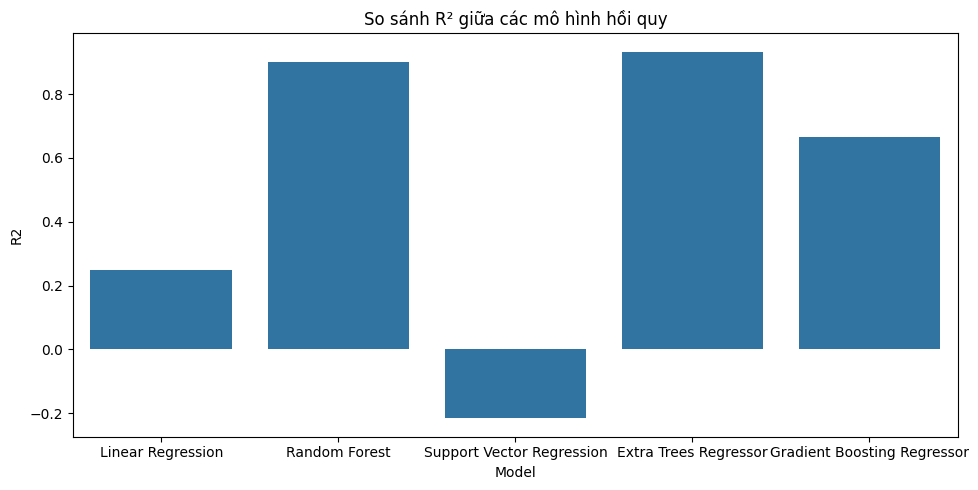

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(data=results, x="Model", y="R2")
plt.title("So s√°nh R¬≤ gi·ªØa c√°c m√¥ h√¨nh h·ªìi quy")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "model_comparison.png"))
plt.show()
plt.close()

In [93]:


model = joblib.load(r"..\output\model\extra_trees_model.joblib")

country = input("Nh·∫≠p t√™n qu·ªëc gia: ")
year = int(input("NƒÉm: "))
agri = float(input("Lao ƒë·ªông n√¥ng nghi·ªáp (%): "))
ind = float(input("Lao ƒë·ªông c√¥ng nghi·ªáp (%): "))
serv = float(input("Lao ƒë·ªông d·ªãch v·ª• (%): "))
unemp = float(input("T·ª∑ l·ªá th·∫•t nghi·ªáp (%): "))

country_code = le.transform([country])[0]

# T·∫°o DataFrame
new_data = pd.DataFrame({
    'Country_Code': [country_code],
    'Year': [year],
    'Labor_Agriculture': [agri],
    'Labor_Industry': [ind],
    'Labor_Services': [serv],
    'Unemployment_Rate': [unemp]
})

# Chu·∫©n h√≥a c√°c c·ªôt li√™n t·ª•c
cols_to_scale = ['Year', 'Labor_Agriculture', 'Labor_Industry', 'Labor_Services', 'Unemployment_Rate']
new_scaled = new_data.copy()
new_scaled[cols_to_scale] = scaler.transform(new_data[cols_to_scale])

# D·ª± ƒëo√°n GDP
pred = model.predict(new_scaled)[0]
print(f"\nüåç Qu·ªëc gia: {country}")
print(f"üìÖ NƒÉm: {year}")
print(f"üìà D·ª± ƒëo√°n GDP: {pred:,.2f} USD")



üåç Qu·ªëc gia: Viet Nam
üìÖ NƒÉm: 2022
üìà D·ª± ƒëo√°n GDP: 343,009,024,609.09 USD
